## 1. Data Information

Loan Default Prediction Dataset This dataset contains information about customer loans, including customer demographics, loan details, and default status. The dataset can be used for various data analysis and machine learning tasks, such as predicting loan default risk. 

  ## 2. Goal

* Building a machine learning model to predict DEFAULT and NO DEFAULT states based on Current_loan_status variable in the data set. 


* Examining the bank"s profit situation in case the customer gives a loan considering the risk of default or rejects the customer"s loan request.(customer policy analysis)

## 3. Features

* customer_id: Unique identifier for each customer 
* customer_age: Age of the customer
* customer_income: Annual income of the customer 
* home_ownership: Home ownership status (e.g., RENT, OWN, MORTGAGE)
* employment_duration: Duration of employment in months
* loan_intent: Purpose of the loan (e.g., PERSONAL, EDUCATION, MEDICAL, VENTURE)
* loan_grade: Grade assigned to the loan
* loan_amnt: Loan amount requested
* loan_int_rate: Interest rate of the loan
* term_years: Loan term in years
* historical_default: Indicates if the customer has a history of default (Y/N)
* cred_hist_length: Length of the customer"s credit history in years
* Current_loan_status: Current status of the loan (DEFAULT, NO DEFAULT)

## 4. Data Loading and Initial Overview

In [86]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, classification_report


# ignore all warnings
#import warnings
#warnings.simplefilter("ignore")


In [87]:
# Load the dataset

df = pd.read_csv("LoanDataset.csv")

In [88]:
# Display the first 5 rows of the dataset

df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [89]:
# Get a summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  object 
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  object 
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   11849 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ MB


## 5. Preparing Of The Data For Model

## 5.a. Dropping Customer Id Column

In [90]:
# Drop the "customer_id" column from the DataFrame

df.drop(columns = "customer_id", inplace = True)

# Display the first 5 rows of the dataset
df.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


## 5.b. Converting Binary Type Of The Depended Column

In [91]:
def binary_convert(df, col_name):
    
    """
    ##################################################################
    
    Converts the values of "DEFAULT" and ""DEFAULT NO" to 1 and 0 in the specified 
    column in the given DataFrame.
    
    Args:
    df (pd. DataFrame): The DataFrame to act on.
    column_name (str): The name of the column to be transformed.

    Returns:
    Pd. DataFrame: The DataFrame to which the values are converted.
    
    #####################################################################
    """
    # Convert categorical variables to numerical values
    df[col_name] = df[col_name].map({"DEFAULT": 1 ,"NO DEFAULT": 0})
    
    return df[col_name].head()

# Applying the function to the DataFrame
binary_convert(df, "Current_loan_status")


0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Current_loan_status, dtype: float64

## 5.c. Converting Ordinal Type Of The Loan Grade Column

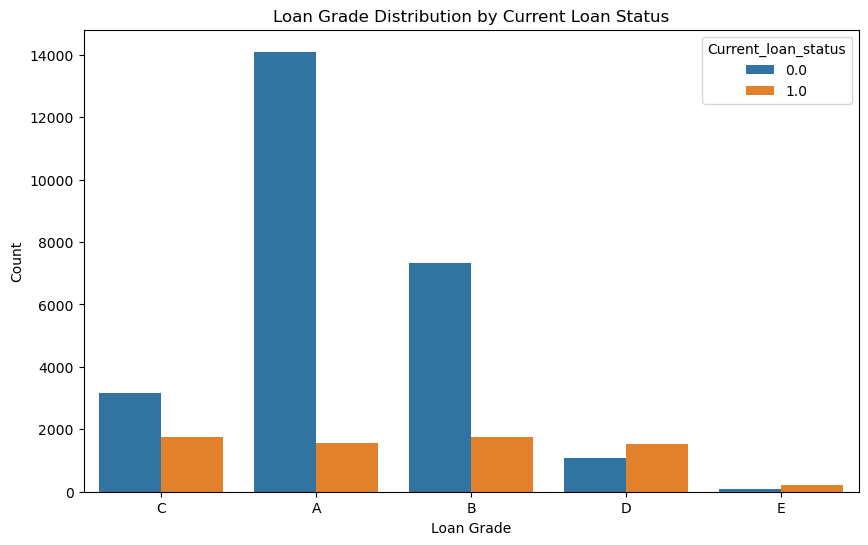

In [92]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x = "loan_grade", hue = "Current_loan_status")
plt.title("Loan Grade Distribution by Current Loan Status")
plt.xlabel("Loan Grade")
plt.ylabel("Count")
plt.show()

In [93]:
# Determine the number of loan grade groups

df.loan_grade.value_counts()

loan_grade
A    15661
B     9065
C     4926
D     2629
E      305
Name: count, dtype: int64

In [94]:
# Determine average interest rates by groups

df.groupby("loan_grade")["loan_int_rate"].mean()

loan_grade
A     8.557445
B    11.788434
C    14.235495
D    15.959060
E    18.964103
Name: loan_int_rate, dtype: float64

When we examine the table and the average interest rates, we observe that the system is structured as follows: "A": 5, "B": 4, "C": 3, "D": 2, "E": 1.

In [95]:
def ordinary_convert(df, col_name):
    
    """
    ##################################################################
    Converts the values of "A,B,C,D,E" to 5,4,3,2,1 in the specified 
    column in the given DataFrame.
    
    Args:
    df (pd. DataFrame): The DataFrame to act on.
    column_name (str): The name of the column to be transformed.

    Returns:
    Pd. DataFrame: The DataFrame to which the values are converted.
    
    ##################################################################
    """
    # Convert string type values ​​to ordinary type values
    df[col_name] = df[col_name].map({"A": 5, "B": 4, "C": 3, "D": 2, "E": 1})

    # Return DataFrame
    return df

# Applying the function to the DataFrame
ordinary_convert(df, "loan_grade").head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,22,59000,RENT,123.0,PERSONAL,3,"£35,000.00",16.02,10,Y,3,1.0
1,21,9600,OWN,5.0,EDUCATION,5,"£1,000.00",11.14,1,NaN,2,0.0
2,25,9600,MORTGAGE,1.0,MEDICAL,4,"£5,500.00",12.87,5,N,3,1.0
3,23,65500,RENT,4.0,MEDICAL,4,"£35,000.00",15.23,10,N,2,1.0
4,24,54400,RENT,8.0,MEDICAL,4,"£35,000.00",14.27,10,Y,4,1.0


## 5.d. Converting Integer Value Of The Customer Income Column

In [96]:
# Remove commas and whitespace from "customer_income" column
df["customer_income"] = df["customer_income"].str.replace(",", "").str.strip()

# Convert "customer_income" column to integers
df["customer_income"] = df["customer_income"].astype("float64")

# Print the data type of "customer_income" column
print("customer_income data type: ", df["customer_income"].dtype)

customer_income data type:  float64


## 5.e. Converting Integer Value Of The Loan Amount Column

In [97]:
# Remove commas and currency symbols from "loan_amnt" column
df["loan_amnt"] = df["loan_amnt"].str.replace(",", "").str.strip("£")

# Convert "loan_amnt" column to float
df["loan_amnt"] = df["loan_amnt"].astype("float64")

# Print the data type of "customer_income" column
print("loan_amnt data type: ", df["loan_amnt"].dtype)

loan_amnt data type:  float64


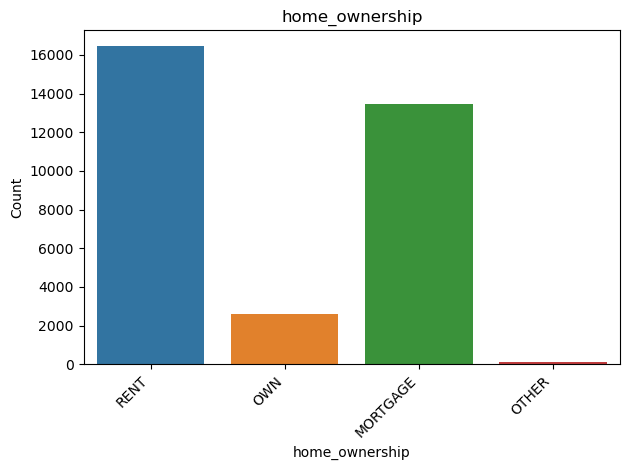

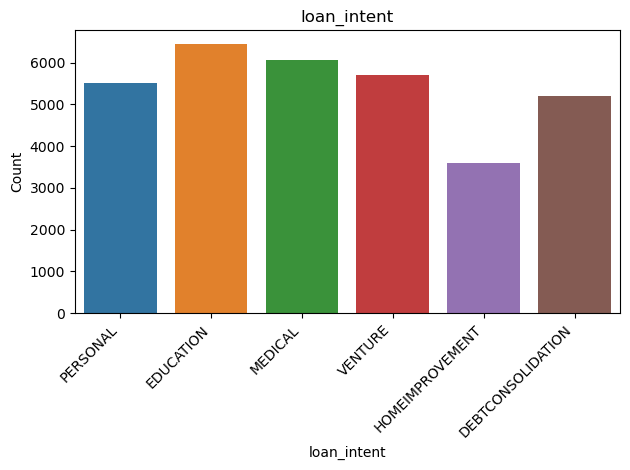

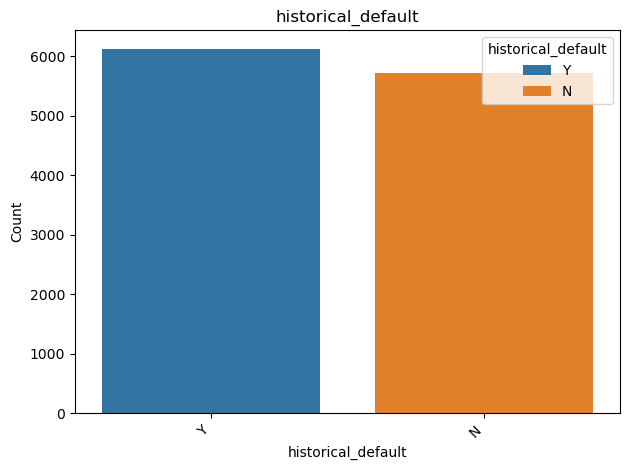

In [98]:
# Defining categorical columns
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]

for i in cat_cols:
    plt.figure()
    sns.countplot(data = df, x = i, hue = i, palette = "tab10")
    plt.title(i)
    plt.ylabel("Count")
    plt.xticks(rotation = 45, ha = "right")
    plt.tight_layout()
    plt.show()
    

In [99]:
# Summary statistics of numerical data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,32586.0,27.732769,6.360528,3.00,23.0,26.00,30.00,144.00
customer_income,32586.0,66076.371386,61980.289734,4000.00,38500.0,55000.00,79200.00,6000000.00
employment_duration,31691.0,4.790161,4.142746,0.00,2.0,4.00,7.00,123.00
loan_grade,32586.0,4.139999,1.009535,1.00,4.0,4.00,5.00,5.00
loan_amnt,32585.0,9756.246739,21771.851498,500.00,5000.0,8000.00,12200.00,3500000.00
loan_int_rate,29470.0,11.011553,3.240440,5.42,7.9,10.99,13.47,23.22
term_years,32586.0,4.761738,2.471107,1.00,3.0,4.00,7.00,10.00
cred_hist_length,32586.0,5.804026,4.055078,2.00,3.0,4.00,8.00,30.00
Current_loan_status,32582.0,0.209932,0.407266,0.00,0.0,0.00,0.00,1.00


Anormal Values:

customer_age:

Values such as 144 years are unusually high. Such values are often due to data entry errors.

customer_income:

Values like 6,000,000 are anormally high. These values are typically due to data entry errors or outliers.


employment_duration:

A duration of 123 years is unrealistically long. A realistic employment duration cannot be this extensive.


loan_amnt:

Values like 3,500,000 are extremely high for loan amounts. These values might be outliers.


cred_hist_length:

Values such as 30 years are unusually long for credit history length. This kind of duration may be anormal.

In [100]:
# checkinc customer age colums for outlier or wrong values
df[df["customer_age"] > 100]

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
81,144,250000.0,RENT,4.0,VENTURE,4,4800.0,13.57,4,NaN,3,0.0
183,144,200000.0,MORTGAGE,4.0,EDUCATION,5,6000.0,11.86,4,NaN,2,0.0
577,123,80004.0,RENT,2.0,EDUCATION,5,20400.0,10.25,9,NaN,3,0.0
749,123,78000.0,RENT,7.0,VENTURE,5,20000.0,NaN,9,NaN,4,0.0
32302,144,6000000.0,MORTGAGE,12.0,PERSONAL,3,5000.0,12.73,4,N,25,0.0


In [101]:
 def remove_outliers(df, column):
     
    """
    
    ##################################################################
    Removes outliers from the specified column of the DataFrame using
    the Interquartile Range (IQR) method.

    Values outside these bounds are considered outliers and are removed from the DataFrame.

    Returns:
    DataFrame: The DataFrame with outliers removed from the specified column.
    
    ##################################################################

    
    """
    # lower quantile 
    Q1 = df[column].quantile(0.25)

    # Upper quantile
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]



# Apply the function to the required columns
df = remove_outliers(df, "customer_income")
df = remove_outliers(df, "customer_age")
df = remove_outliers(df, "employment_duration")

# Checking changes with customer_age column
print("max age:", df["customer_age"].max())
print("min age:", df["customer_age"].min())

max age: 40
min age: 20


In [102]:
df.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
1,21,9600.0,OWN,5.0,EDUCATION,5,1000.0,11.14,1,NaN,2,0.0
2,25,9600.0,MORTGAGE,1.0,MEDICAL,4,5500.0,12.87,5,N,3,1.0
3,23,65500.0,RENT,4.0,MEDICAL,4,35000.0,15.23,10,N,2,1.0
4,24,54400.0,RENT,8.0,MEDICAL,4,35000.0,14.27,10,Y,4,1.0
5,21,9900.0,OWN,2.0,VENTURE,5,2500.0,7.14,1,N,2,1.0


## 6. Filling Missing Values In The Dataset

In [103]:
# Check the missing values in the dataset

df.isnull().sum()

customer_age               0
customer_income            0
home_ownership             0
employment_duration        0
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate           2702
term_years                 0
historical_default     18317
cred_hist_length           0
Current_loan_status        4
dtype: int64

## 6.a. Removing Missing Value Of The Loan Amount Column

Since the number of missing values is small, the deletion method was used instead of other methods.

In [104]:
# Remove missing values from the "loan_amnt" column
# Count of missing value = 1

df.dropna(subset = ["loan_amnt"], inplace = True)

## 6.b. Filling NA Values Of The Historical Default Column

In [105]:
# Count occurrences of "Y", "N", and missing values

print(df["historical_default"].value_counts(dropna = False))

historical_default
NaN    18317
Y       5357
N       4581
Name: count, dtype: int64


print(df["Current_default_status"])

In [106]:
# Count of values of the Current loan status column

print(df["Current_loan_status"].value_counts(dropna = False))

Current_loan_status
0.0    22155
1.0     6096
NaN        4
Name: count, dtype: int64


The customer"s past credit default status (YES/NO). When we look at the current situation, the data entries are recorded as "Y": 62128 and "N": 5721. Considering the values in the "Current loan status" column, it is observed that giving the value "N" to all the entries does not cause a proportional change. Therefore, the NaN values have been filled with "N"."

In [107]:
# Filling missing values with "N"
# Count of missing value = 20737

df["historical_default"] = df["historical_default"].fillna("N")

## 6.c. Filling Missing Values Of The Employement Duration Column

In [108]:
df["employment_duration"].value_counts().head(10).sum()

25883

In [109]:
# Frequencies of values in the employment_duration column
# Display most frequent 10 value

df["employment_duration"].value_counts().head(10)

employment_duration
0.0    3784
2.0    3538
3.0    3175
5.0    2714
1.0    2695
4.0    2628
6.0    2509
7.0    2073
8.0    1538
9.0    1229
Name: count, dtype: int64

The missing values in the employment_duration column have been filled by calculating the probabilities of the top 10 most frequent values.

In [110]:
def fill_missing_employment_duration(df):
    
    """
     
    ############################################################
    
    Fills missing values in "employment_duration" column using 
    the most frequent values and their probabilities.

    Parameters:
    df DataFrame containing the "employment_duration" column.

    Returns:
    df DataFrame with filled missing values in "employment_duration".
    
    ############################################################
    
    """
    
     # Calculate the 10 most frequent values in the "employment_duration" column
    most_freq_value = df["employment_duration"].value_counts().head(10)
    
    # Calculate the sum of the frequencies of these 10 most frequent values
    most_freq_value_sum = most_freq_value.sum()
    
    # Calculate the probability of each of the 10 most frequent values
    most_freq_value_probability = most_freq_value.apply(lambda row: row / most_freq_value_sum)

    # Get the indices of the rows with missing values in "employment_duration"
    missing_indices = df[df["employment_duration"].isnull()].index
    
    # Fill the missing values using a random choice based on the calculated probabilities
    df.loc[missing_indices, "employment_duration"] = np.random.choice(
                                                     most_freq_value.index,  
                                                     size = len(missing_indices),  
                                                     p = most_freq_value_probability)
    # Return DataFrame
    return df

# Applying the function to the DataFrame
df = fill_missing_employment_duration(df)

print("Sum values of employment duration column:", df["employment_duration"].isnull().sum())

Sum values of employment duration column: 0


In [111]:
# Frequencies of values in the employment_duration column
# count of missing value = 895

df["employment_duration"].value_counts().head(10)

employment_duration
0.0    3784
2.0    3538
3.0    3175
5.0    2714
1.0    2695
4.0    2628
6.0    2509
7.0    2073
8.0    1538
9.0    1229
Name: count, dtype: int64

## 6.d.Filling Missing Values Of The Loan In Rate Column

Instead of filling missing values in the loan_int_rate column using the overall average, the average interest rates based on each loan_grade were used to fill the missing values.

In [112]:
# Calculation of the average interest rates based on the average values for each loan grade

df.groupby("loan_grade")["loan_int_rate"].mean()

loan_grade
1    18.984605
2    15.973780
3    14.308842
4    11.869601
5     8.652127
Name: loan_int_rate, dtype: float64

In [113]:
def fill_missing_loan_int_rate(df):
    
    """

    ##################################################################
    
    Fills missing values in "loan_int_rate" column with the mean value
    of "loan_int_rate" for each "loan_grade".

    Parameters:
    df DataFrame , "loan_int_rate" and "loan_grade" columns.

    Returns:
    df DataFrame with filled missing values in "loan_int_rate".
    
    ###################################################################
    
    """
    
        
    # Calculate mean values by loan_grade
    mean_by_grade = df.groupby("loan_grade")["loan_int_rate"].mean()

    # Fill missing values in loan_int_rate
    df["loan_int_rate"] = df.apply(
        lambda row: mean_by_grade[row["loan_grade"]] 
        if pd.isna(row["loan_int_rate"]) else row["loan_int_rate"],
        axis=1
    )
    
    # Return DataFrame
    return df  
    
# Applying the function to the DataFrame
df = fill_missing_loan_int_rate(df)

## 6.e. Dropping Missing Values Of the Current Loan Status Column

Since the number of missing values is small, the deletion method was used instead of other methods.

In [114]:
# Dropping missing values
# Count of missing value = 4

df.dropna(subset=["Current_loan_status"], inplace=True)

In [115]:
# Checking Missing values of dataframe

df.isnull().sum()

customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate          0
term_years             0
historical_default     0
cred_hist_length       0
Current_loan_status    0
dtype: int64

In [116]:
# Display the first 5 rows of the dataset

df.head(5)

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
1,21,9600.0,OWN,5.0,EDUCATION,5,1000.0,11.14,1,N,2,0.0
2,25,9600.0,MORTGAGE,1.0,MEDICAL,4,5500.0,12.87,5,N,3,1.0
3,23,65500.0,RENT,4.0,MEDICAL,4,35000.0,15.23,10,N,2,1.0
4,24,54400.0,RENT,8.0,MEDICAL,4,35000.0,14.27,10,Y,4,1.0
5,21,9900.0,OWN,2.0,VENTURE,5,2500.0,7.14,1,N,2,1.0


## 7. Model Building


## 7.1. Preparing DataFrame Before Modelling

In [159]:
# Defining depended features and target values

X = df.drop("Current_loan_status", axis = 1)
y = df["Current_loan_status"].astype(int)

In [161]:
X.drop(["home_ownership", "historical_default", "loan_intent"], axis = 1, inplace = True)

## 7.2. Converting Binary Type Of The Categorical Values

In [162]:
# Defining categorical columns
cat_cols = [col for col in X.columns if X[col].dtypes == "O"]
num_cols = [col for col in X.columns if X[col].dtypes != "O"]

# Printing categorcal and numerical column names
print("categorical columns :", cat_cols)
print("numerical columns :", num_cols)

categorical columns : []
numerical columns : ['customer_age', 'customer_income', 'employment_duration', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'term_years', 'cred_hist_length']


In [163]:
# Convert categorical columns to numerical using one-hot encoding
dummies = pd.get_dummies(X[cat_cols], drop_first = True).astype(int)

# Display 5 rows
dummies.head(5)

ValueError: No objects to concatenate

In [ ]:
# Drop the categorical columns from the X

X.drop(cat_cols, axis = 1, inplace = True)

In [ ]:
# Concatenate the DataFrame X with the dummies
X = pd.concat([X, dummies], axis = 1)


# Display 5 rows
X.head(5)

## 7.3. Splitting Test And Train Data

In [164]:
# Splitting data into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [165]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)    

In [166]:
X_train.shape


(22600, 8)

In [167]:
y_train.shape

(22600,)

In [168]:
y_train

24358    0
8861     0
24921    0
26941    1
5929     0
        ..
23210    1
5806     0
1049     0
16764    0
25434    0
Name: Current_loan_status, Length: 22600, dtype: int32

In [169]:
y

1        0
2        1
3        1
4        1
5        1
        ..
32292    1
32294    0
32295    0
32298    0
32301    1
Name: Current_loan_status, Length: 28251, dtype: int32

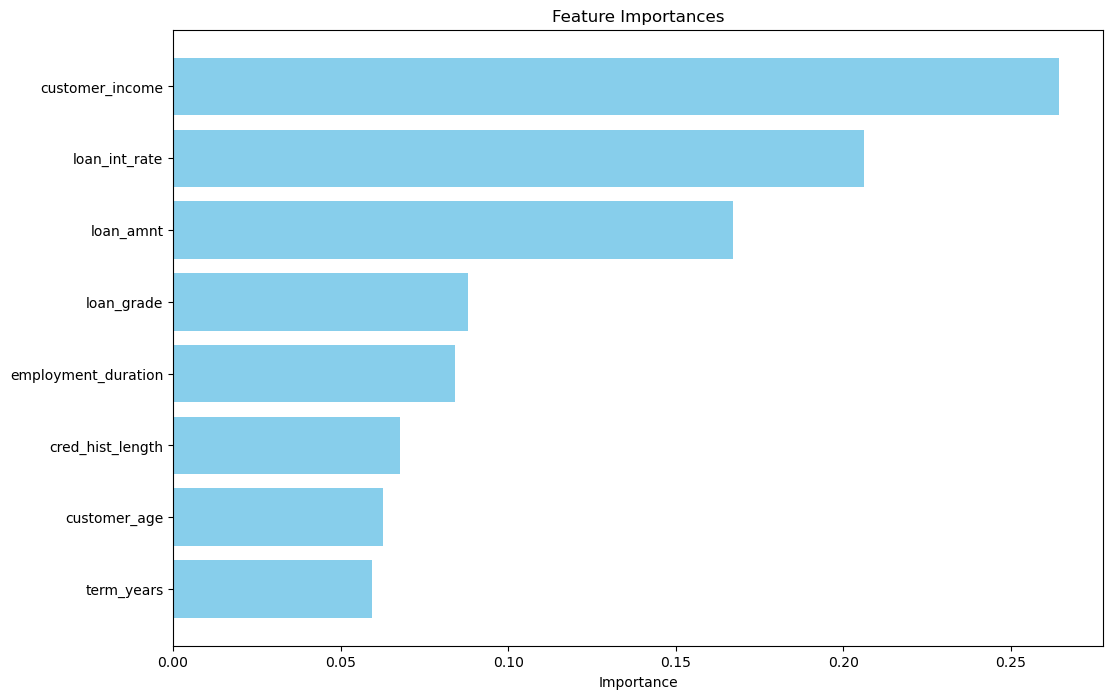

In [170]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

def plot_feature_importances(model, feature_names):
    """
    Özelliklerin önem derecelerini görselleştiren fonksiyon.
    
    Args:
        model: Özelliklerin önem derecelerini sağlayan model (örneğin, RandomForestClassifier).
        feature_names: Özellik adlarını içeren liste veya dizi.
        
    Returns:
        None
    """
    # Özelliklerin önem derecelerini al
    importances = model.feature_importances_
    
    # Özellikler ve önem derecelerini bir DataFrame'e dönüştür
    feature_importances = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    
    # Önem derecelerini azalan sıraya göre sırala
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
    
    # Görselleştirme
    plt.figure(figsize=(12, 8))
    plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.title('Feature Importances')
    plt.gca().invert_yaxis()
    plt.show()



# Özellik adlarını tanımla (eğer veri bir NumPy dizisi ise)
feature_names = X.columns
# Modeli eğit
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Özelliklerin önem derecelerini görselleştir
plot_feature_importances(model, feature_names)


## 7.4. Generate Model

In [171]:
search_space = [
   
    
    # Random Forest Classifier
    {
        "classifier": [RandomForestClassifier(random_state=42)],
        "classifier__n_estimators": [100, 200, 300, 500, 1000],
        "classifier__max_depth": [5, 10, 20, 50],
        "classifier__min_samples_split": [2, 4, 6, 10],
        "classifier__min_samples_leaf": [2, 4, 6, 10]
    }


    
]


In [172]:
# Creating a Pipeline for odels
# In the pipeline there are data standardization and "classifier" model.

pipe = Pipeline([("scaler", StandardScaler()), ("classifier", RandomForestClassifier(random_state = 42))])

In [173]:
# Creating GridSearchCv 
# Using search_space variables
# Selected StratifiedKFold cros validation. Maintains class proportions at each layer.

clf = GridSearchCV(pipe, search_space, cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42),
                                            scoring = "accuracy", verbose = 2, n_jobs = -1)


# The GridSearchCV process is run on the training data.
best_model = clf.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


In [174]:
# We get the hyperparameters of the best model 

best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classifier',
   RandomForestClassifier(max_depth=50, min_samples_leaf=2, n_estimators=1000,
                          random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': RandomForestClassifier(max_depth=50, min_samples_leaf=2, n_estimators=1000,
                        random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__bootstrap': True,
 'classifier__ccp_alpha': 0.0,
 'classifier__class_weight': None,
 'classifier__criterion': 'gini',
 'classifier__max_depth': 50,
 'classifier__max_features': 'sqrt',
 'classifier__max_leaf_nodes': None,
 'classifier__max_samples': None,
 'classifier__min_impurity_decrease': 0.0,
 'classifier__min_samples_leaf': 2,
 'classifier__min_samples_split': 2,
 'classifier__min_weight_fraction_leaf': 0.0,
 'classifier__monotonic_cst': None,
 'classifier__n_estimators': 1000,
 'classifier__n_jobs': None,
 'classif

In [175]:
# Converting DataFrame best model results.
models = pd.DataFrame(best_model.cv_results_)

# Display 5 rows
models.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__max_depth,param_classifier__min_samples_leaf,param_classifier__min_samples_split,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.410487,0.007658,0.038184,0.006253,RandomForestClassifier(random_state=42),5,2,2,100,{'classifier': RandomForestClassifier(random_s...,0.840708,0.844469,0.833407,0.829204,0.840929,0.837743,0.005584,266
1,2.672185,0.038313,0.083300,0.009484,RandomForestClassifier(random_state=42),5,2,2,200,{'classifier': RandomForestClassifier(random_s...,0.838053,0.846239,0.834292,0.827434,0.840265,0.837257,0.006255,315
2,3.939781,0.062900,0.113447,0.004126,RandomForestClassifier(random_state=42),5,2,2,300,{'classifier': RandomForestClassifier(random_s...,0.838938,0.846018,0.834292,0.827655,0.840044,0.837389,0.006136,300
3,6.492667,0.081472,0.187536,0.009729,RandomForestClassifier(random_state=42),5,2,2,500,{'classifier': RandomForestClassifier(random_s...,0.839159,0.846903,0.835841,0.827212,0.839602,0.837743,0.006385,266
4,13.036535,0.156464,0.385084,0.013355,RandomForestClassifier(random_state=42),5,2,2,1000,{'classifier': RandomForestClassifier(random_s...,0.841372,0.846018,0.836062,0.827434,0.841150,0.838407,0.006327,250


In [176]:

def summarize_grid_search_results(grid_search):
    
    """
    
    ##################################################################
    
    Summarizes the results of a GridSearchCV object by extracting 
    the mean test scores for each classifier and selecting the best 
    results based on accuracy score. 

    Parameters:
    grid_search: GridSearchCV object
        The GridSearchCV object containing the cross-validation results.

    Returns:
    pd.DataFrame
        A DataFrame containing the classifier names and their corresponding 
        mean test scores.
    
    ###################################################################
    
    """
    
    # Converting DataFrame
    models = pd.DataFrame(grid_search.cv_results_)
    
    # Selecting columns
    models = models[["param_classifier", "mean_test_score"]]
    
    # Splitting model names
    models["param_classifier"] = models["param_classifier"].astype(str).apply(lambda x: x.split("(")[0])
    
    # Selecting best accuracy scores
    best_results = models.loc[models.groupby("param_classifier")["mean_test_score"].idxmax()]
    
    # Sorting consequences
    best_results = best_results.sort_values(by = "mean_test_score", ascending=False).reset_index(drop = True)
    
    # Setting index
    best_results.index = best_results.index + 1

    # Returning best result
    return best_results

# Applying the function to the DataFrame
best_summary_df = summarize_grid_search_results(best_model)
print(best_summary_df)

         param_classifier  mean_test_score
1  RandomForestClassifier         0.873407


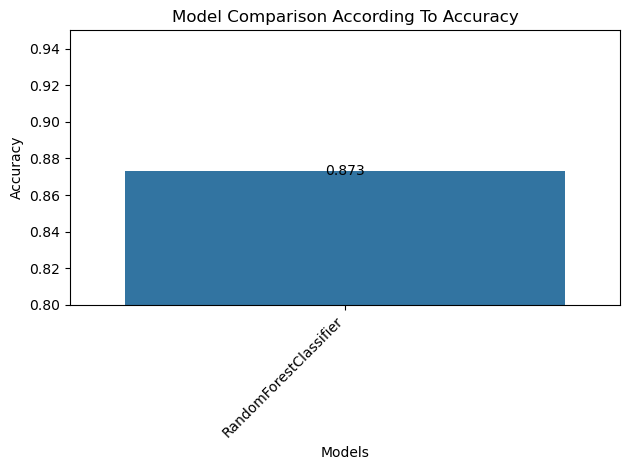

In [177]:
# Create a bar plot to examine the models
plt.figure()
bar_plot = sns.barplot(data = best_summary_df, x = "param_classifier", y = "mean_test_score", hue = "param_classifier")
plt.ylim(0.80, 0.95)
plt.title("Model Comparison According To Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation = 45, ha = "right")

# Annotate each bar with its value
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f"{height:.3}", (p.get_x() + p.get_width() / 2, height),
                      ha="center", va="center", fontsize = 10)

plt.tight_layout()
plt.show()


GridSearchCV determined the best model as GradientBoostingClassifier. As a result of the modeling, the Accuracy score: 0.930018. 
* The best model parameters determined were: GradientBoostingClassifier(max_depth=10, n_estimators=500, random_state=42).

## 7.5. Remodelling With Best Model

In [ ]:
# Build  GdradientBoostingClassifier model
selected_model = GradientBoostingClassifier(max_depth = 10, n_estimators = 500, random_state = 42)

# Fit model
selected_model.fit(X_train, y_train)

# Predicting y_pred using X_test values
y_pred = selected_model.predict(X_test)

# Calculate the model"s predicted probabilities
y_proba = selected_model.predict_proba(X_test)

## 7.6. Generate and Visualize Confusion Matrix

In [ ]:
# Create a classification report to interpret the results
report = classification_report(y_test, y_pred, output_dict = True)

# Convert DataFrame
report_df = pd.DataFrame(report).transpose()
report_df


Confusion matrix is ​​used to measure the performance of your classification model
 The confusion matrix used when determining a bank"s lending strategy can be interpreted as follows:



True Positives (TP): The model accurately predicts customers who will repay the lo


an.
True Negatives (TN): The model accurately predicts customers who will not repay the l


oan.
False Positives (FP): The model grants loans to customers who will not repay the loan (bad credit r


isk).
False Negatives (FN): The model does not grant loans to customers who will repay the loan (loss of potential pro
fits).

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = selected_model.classes_)
disp.plot(cmap = plt.cm.Reds, colorbar = False)
plt.show()

In [ ]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
roc_auc = auc(fpr, tpr)

#  Drawing ROC curve 
plt.figure()
plt.plot(fpr, tpr, color = "orange",  label = f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color = "blue",  linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc = "lower right")
plt.show()


In [ ]:
# Find best treshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold}")

In [ ]:

# Tahmin edilen olasılıkları hesapla
selected_model = GradientBoostingClassifier(max_depth=10, n_estimators=500, random_state=42)
selected_model.fit(X_train, y_train)
y_proba = selected_model.predict_proba(X_test)

# Optimal threshold"u kullanarak tahminler yapma
optimal_threshold = 0.022290952030143734
y_pred = np.where(y_proba[:, 1] >= optimal_threshold, 1, 0)

# Confusion matrix oluşturma ve gösterme
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=selected_model.classes_)
disp.plot(cmap=plt.cm.Reds, colorbar=False)
plt.show()

# ROC Curve için hesaplamalar
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
roc_auc = auc(fpr, tpr)

# ROC eğrisini çizme
plt.figure()
plt.plot(fpr, tpr, color="orange",  label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="blue", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

# Sonuçları yorumlamak için classification report oluşturma
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)


When we examine the new confusion matrix and its associated metrics after threshold optimization, we can observe improvements in certain aspects of our model"s performance.

### Analysis of New Results

* True Negatives (TN): Decreased from 5065 to 4730
* False Positives (FP): Increased from 84 to 419
* False Negatives (FN): Decreased from 346 to 211
* True Positives (TP): Increased from 1022 to 1157

### Comparison of Metrics

#### Old Metrics:
* Precision: 0.924
* Recall: 0.747
* F1-score: 0.826

#### New Metrics:

* Precision: 0.734
* Recall: 0.846
* F1-score: 0.786
### Interpretation of the Change

#### Decrease in Precision: 

The increase in false positives (FP) led to a decrease in precision. This means the model is producing more false alarms (false positives).
#### Increase in Recall:

The decrease in false negatives (FN) led to an increase in recall. This indicates that the model is capturing more true positives.

#### F1-score:
Despite the decrease in precision due to the increase in recall, we observed a general improvement in the F1-score.(F1-score is the harmonic mean of precision and recall)

## 8. Customer Policy Analysis

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_feature_importances(model, feature_names):
    """
    Özelliklerin önem derecelerini görselleştiren fonksiyon.
    
    Args:
        model: Özelliklerin önem derecelerini sağlayan model (örneğin, RandomForestClassifier).
        feature_names: Özellik adlarını içeren liste veya dizi.
        
    Returns:
        None
    """
    # Özelliklerin önem derecelerini al
    importances = model.feature_importances_
    
    # Özellikler ve önem derecelerini bir DataFrame'e dönüştür
    feature_importances = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    
    # Önem derecelerini azalan sıraya göre sırala
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
    
    # Görselleştirme
    plt.figure(figsize=(12, 8))
    plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.title('Feature Importances')
    plt.gca().invert_yaxis()
    plt.show()

# Örnek kullanım
from sklearn.ensemble import RandomForestClassifier

# Eğitim verileri ve etiketler
X_train = ...  # Eğitim veri seti
y_train = ...  # Eğitim etiketleri

# Modeli eğit
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Özellik adlarını tanımla
feature_names = X.columns  # Kendi özellik isimlerinizi buraya ekleyin

# Özelliklerin önem derecelerini görselleştir
plot_feature_importances(model, feature_names)


TypeError: float() argument must be a string or a real number, not 'ellipsis'

In [ ]:
df.head(3)

In [ ]:
mean_loan_int_rate = df["loan_int_rate"].mean()
mean_loan_term_years = df["term_years"].mean().round()
mean_loan_amount = df["loan_amnt"].mean()


print(f"mean loan int rate : {mean_loan_int_rate:.2f}")
print(f"mean loan term years : {mean_loan_term_years}")
print(f"mean loan amount : {mean_loan_amount:.2f}")